In [1]:
import sympy
import json

In [2]:
primes = [i for i in range(100000) if sympy.isprime(i)]
non_primes = [i for i in range(100000) if i not in primes]

### Next: Base Conversion (optional and not in rendered version)
Base conversion is a simple idea that I had and I wanted to see how it would affect the outcome of the spirals if we put them into different bases, like primes, or powers of 2, etc. If you want to play around with this it's really easy, just choose a number and set No_Base_Conversion to False. It will also change the .json files, because it is nice to store giant lists that take a while to render.

In [3]:

def base_converter(i, highest_power, base):
    
    num = 0
    new_i = i
    if i / base ** (highest_power+1) == 1:
        highest_power += 1
        num = 10 ** (highest_power)
        return num, highest_power
    if True:
        for counter in range(highest_power + 1):
            remainder = new_i // (base ** (highest_power - counter))
            new_i -= (new_i // (base ** (highest_power - counter ))) *  base**(highest_power - counter)
            #print(f'remainder: {remainder}')
            #print(f'new_i: {new_i}')
            num += (10 ** (highest_power - counter)) * remainder
    return num, highest_power


No_Base_Conversion = True
#IF YOU WANT TO DO A NEW BASE OR IT WON'T WORK SET THAT TO FALSE

if No_Base_Conversion:
    f_nonprime = open('nonprimes.json')
    
    new_nonprime = json.load(f_nonprime)

    f_newprime = open('primes.json')
    new_prime = json.load(f_newprime)

else:
    new_prime = []
    new_nonprime = []
    highest_power = 1
    try:
        for i in range(10000000):
            num, highest_power = base_converter(i, highest_power, 7)
            if sympy.isprime(i):
                new_prime.append(num)
            else:   new_nonprime.append(num)
            if i % 1000000== 0:
                print(f'Progress: {round(i / 100000, 2)}%')
    except(KeyboardInterrupt):
        with open('primes.json', 'w') as f:
            json.dump(new_prime, f)
        with open('nonprimes.json', 'w') as f:
            json.dump(new_nonprime, f)

    with open('primes.json', 'w') as f:
        json.dump(new_prime, f)
    with open('nonprimes.json', 'w') as f:
        json.dump(new_nonprime, f)


### Next Steps: Plotting

Now, we want to start to make our numbers into spirals. We are going to do this using datashader, and polar coordinated. To do this, you need to remember what polar coordinates are (or maybe learn them for the first time), so lets do a brief refresher.
First, Polar Coordinates are coordinates that are designed to make math with circles and other objects that relate to sin and cosine. For some point on a polar axis a, it's coordinates are (r, $\theta$), where r is the distance of the point from the origin, and theta is the angle that a line the point would make with X axis.
For our purposes, are are going to use r and $\theta$ to both be the same number, $n$ for some $n \in \mathbb{N}$. What is import to know, is that we can transfer polar coordinates from a euclidean plane (standard x-y axis) using the formula:
- ($r * cos(\theta)$, $r * sin(\theta)$)
where r and $\theta$ are both $n$

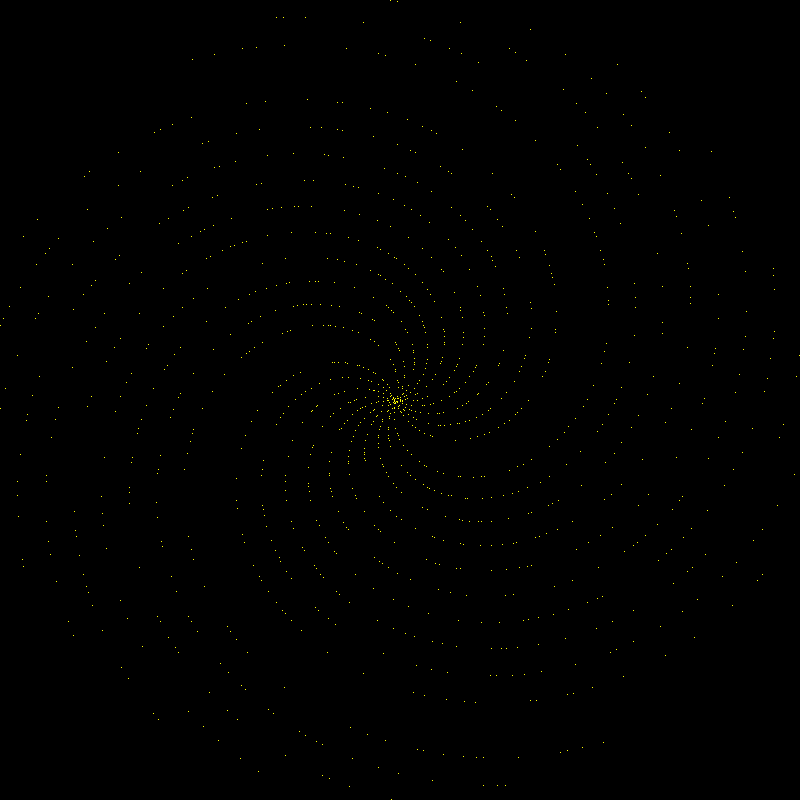

In [4]:



import pandas as pd
from math import sin, cos, e
import datashader as ds
import numpy as np
from datashader.utils import export_image


increment = 10000 #We use the increment because I find it shows up better on the plot this way
xp = []
yp = []
xnp = []
ynp = []

'''
this next part is obviously do-able with list iteration, but I this it helps
to do it this way in order to make changes later.
'''
for num in range(increment):
    if num in primes:
        xp.append(cos(num)* num)
        yp.append(sin(num) * num)
        xnp.append(0)
        ynp.append(0)
    else:
        xnp.append(cos(num) * num)
        ynp.append(sin(num) * num) 
        xp.append(0)
        yp.append(0)


primedf = pd.DataFrame({'Xp': xp, "Yp": yp})
df = pd.DataFrame({'npx':xnp, 'npy':ynp})

cvs = ds.Canvas(plot_width=800, plot_height=800)
agg = cvs.points(df, "npx", "npy")

img = ds.tf.shade(agg, min_alpha=254, alpha=255)


export_image(img, "NonPrimeSpiral", background="black", export_path=".")



aggprime = cvs.points(primedf, "Xp", "Yp")
imgprime = ds.tf.shade(aggprime, cmap="yellow", min_alpha=254, alpha=255)

export_image(imgprime, "PrimeSpiral", background="black", export_path='.')



### Last but not least: superimposing
Now, we have to superimpose out prime spiral onto the nonprime spiral, so we can see the difference between the two. This took me a while to come up, but eventually I figured out that if you save both of the images as pngs and load them with cv2, you can convert them into arrays, and add them together to superimpose because none of them share the same points and the backgrounds are both black.

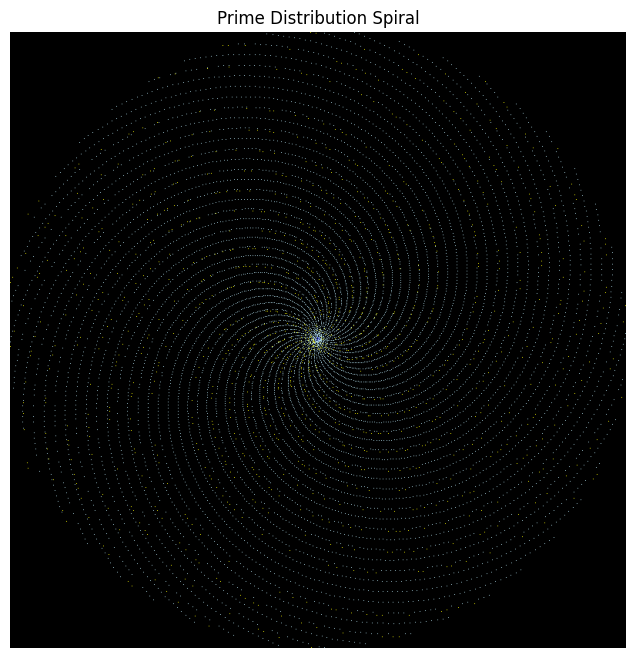

In [5]:
import cv2
from matplotlib import pyplot as plt


backgroundimg = cv2.imread('NonPrimeSpiral.png')
primeimg = cv2.imread('PrimeSpiral.png')
backgroundimg = cv2.cvtColor(backgroundimg, cv2.COLOR_BGR2RGB)
primeimg = cv2.cvtColor(primeimg, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(8,8))
final = np.array(primeimg + backgroundimg)
plt.axis("off")

plt.imshow(final)
plt.title("Prime Distribution Spiral")
plt.savefig('FinalSpiral.png', bbox_inches='tight', pad_inches=0) 
plt.show()

### Wow!!!
Now isn't that neat? I think so. I hope you enjoyed our little journey intro prime number spirals. My favorite part about this, is the fact that after you superimpose the images it's really easy to see that the prime spirals are almost distinct from the non prime ones, and there are some spirals that have no primes in them at all. Weird right? I'll let you think about that one for a bit. Feel free to mess around with this, I have one more picture below (with no explanation).
Credit for this idea goes to [this post.](https://math.stackexchange.com/questions/885879/meaning-of-rays-in-polar-plot-of-prime-numbers/885894) and also 3b1b.

Thaks for reading!!

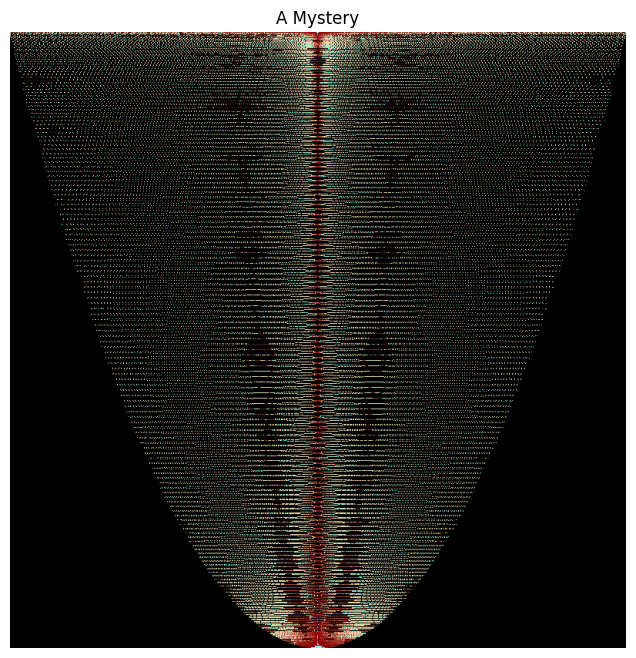

In [6]:
xnp = [cos(num) * num **2 for num in non_primes]
ynp = [cos(num) ** 2 for num in non_primes]
xp = [cos(num) * num **2 for num in primes]
yp = [cos(num) ** 2 for num in primes]
'''
for num in range(1000000):
    if num in primes:
        xp.append(cos(num)* num **2)
        yp.append(cos(num) ** 2)
        xnp.append(0)
        ynp.append(0)
    else:
        xnp.append(cos(num) * num **2)
        ynp.append(cos(num) ** 2) 
        xp.append(0)
        yp.append(0)
'''


primedf = pd.DataFrame({'Xp': xp, "Yp": yp})
df = pd.DataFrame({'npx':xnp, 'npy':ynp})

cvs = ds.Canvas(plot_width=800, plot_height=800)


agg = cvs.points(df, "npx", "npy")
img = ds.tf.shade(agg, min_alpha=254, alpha=255)
export_image(img, "NonPrimeNotSpiral", background="black", export_path=".")



aggprime = cvs.points(primedf, "Xp", "Yp")
imgprime = ds.tf.shade(aggprime, cmap="yellow", min_alpha=254, alpha=255)
export_image(imgprime, "PrimeNotSpiral", background="black", export_path='.')
backgroundimg = cv2.imread('NonPrimeNotSpiral.png')
primeimg = cv2.imread('PrimeNotSpiral.png')


plt.figure(figsize=(8,8))
final = np.array(primeimg + backgroundimg)
plt.axis("off")
plt.title("A Mystery")
plt.imshow(final)
plt.savefig('FinalNotSpiral.png', bbox_inches='tight', pad_inches=0) 
plt.show()